In [1]:
import pandas as pd
from read_data import ReadData

dataReader = ReadData('TrainingData-modified.csv')

In [6]:
X = dataReader.get_rssi()#.values.astype(float)
y = dataReader.get_zone_id()

In [9]:
X.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [10]:
y.head()

0    7
1    7
2    7
3    7
4    0
Name: ZONEID, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
num_classes = y_test.nunique()
num_classes

13

In [29]:
classes=['Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6','Zone 7','Zone 8','Zone 9','Zone 10','Zone 11','Zone 12','Zone 13',]

In [13]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [17]:
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# models
LGR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors=5)
DTC_model = DecisionTreeClassifier()
RFC_model = RandomForestClassifier()
XGB_model = XGBClassifier()
LGB_model = LGBMClassifier()
SVC_model = SVC()
GNB_model = GaussianNB()
NNC_model = MLPClassifier(hidden_layer_sizes=(10,5,), max_iter=1000)

models=[LGR_model,
        KNN_model,
        DTC_model,
        RFC_model,
        XGB_model,
        LGB_model,
        SVC_model,
        GNB_model,
        NNC_model,]

model_list=['LGR_model','KNN_model','DTC_model','RFC_model','XGB_model','LGB_model','SVC_model','GNB_model','NNC_model',]

test_predictions=[]

# Training
for m_idx, model in enumerate(models):
    model.fit(X_train,y_train)
    pickle.dump(model, open(f"Models/{model_list[m_idx]}.sav", 'wb'))
    predictions = model.predict(X_test)
    test_predictions.append(predictions)

    
# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Evaluation
model_acc=[]
model_prec=[]
model_rcal=[]
model_f1=[]
model_cm=[]

for p_idx, prediction in enumerate(test_predictions):
    acc = accuracy_score(y_test, prediction)
    model_acc.append(acc)
    prec = precision_score(y_test, prediction,average='macro')
    model_prec.append(prec)
    rcal = recall_score(y_test, prediction,average='macro')
    model_rcal.append(rcal)
    f1 = f1_score(y_test, prediction,average='macro')
    model_f1.append(f1)
    cm = confusion_matrix(y_test, prediction)
    model_cm.append(cm)

eval_summary = pd.DataFrame.from_dict({"Model":model_list, 
                                       "Accuracy":model_acc, 
                                       "Precision":model_prec, 
                                       "Recall":model_rcal, 
                                       "F1":model_f1,})
eval_summary.to_csv("Models/eval_summary.csv")
eval_summary

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1
0,LGR_model,0.945503,0.943679,0.943495,0.943493
1,KNN_model,0.947844,0.947564,0.946257,0.946267
2,DTC_model,0.938148,0.939300,0.937152,0.938014
3,RFC_model,0.993815,0.994801,0.991845,0.993227
4,XGB_model,0.993815,0.994338,0.991095,0.992601
5,LGB_model,0.995319,0.995878,0.993069,0.994392
6,SVC_model,0.961384,0.962529,0.957508,0.959759
7,GNB_model,0.474925,0.625258,0.531785,0.455524
8,NNC_model,0.941324,0.939685,0.938384,0.938807


In [31]:
cmaps = ['viridis','plasma','inferno','coolwarm','YlGnBu','cividis','cool','copper','twilight_shifted']

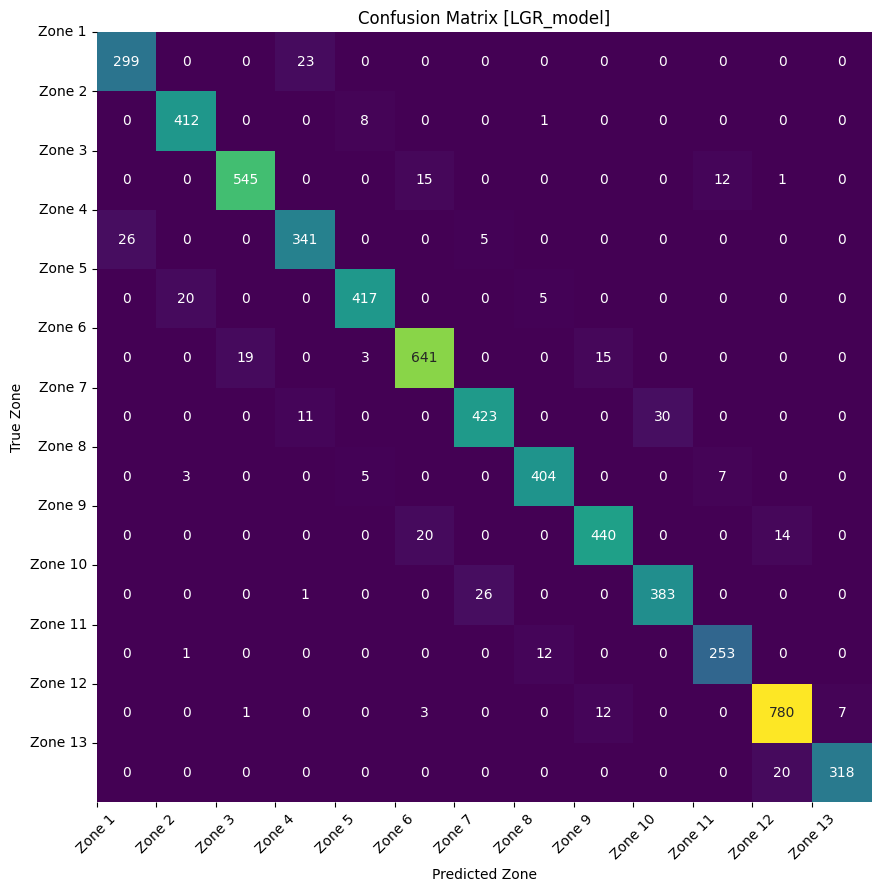

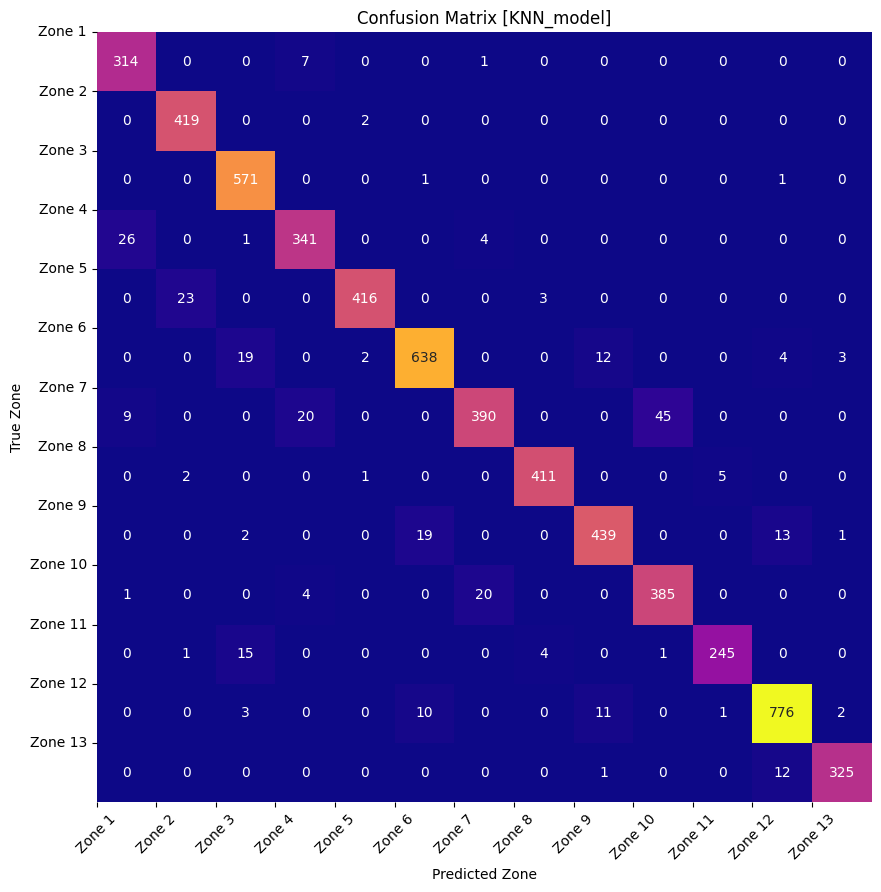

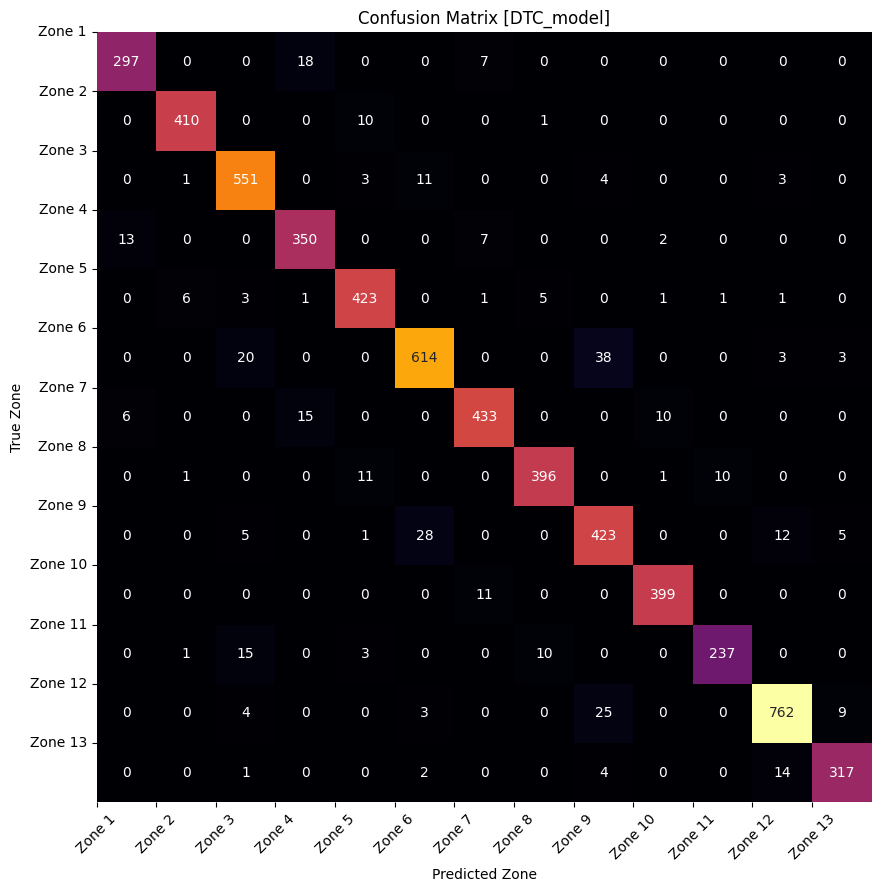

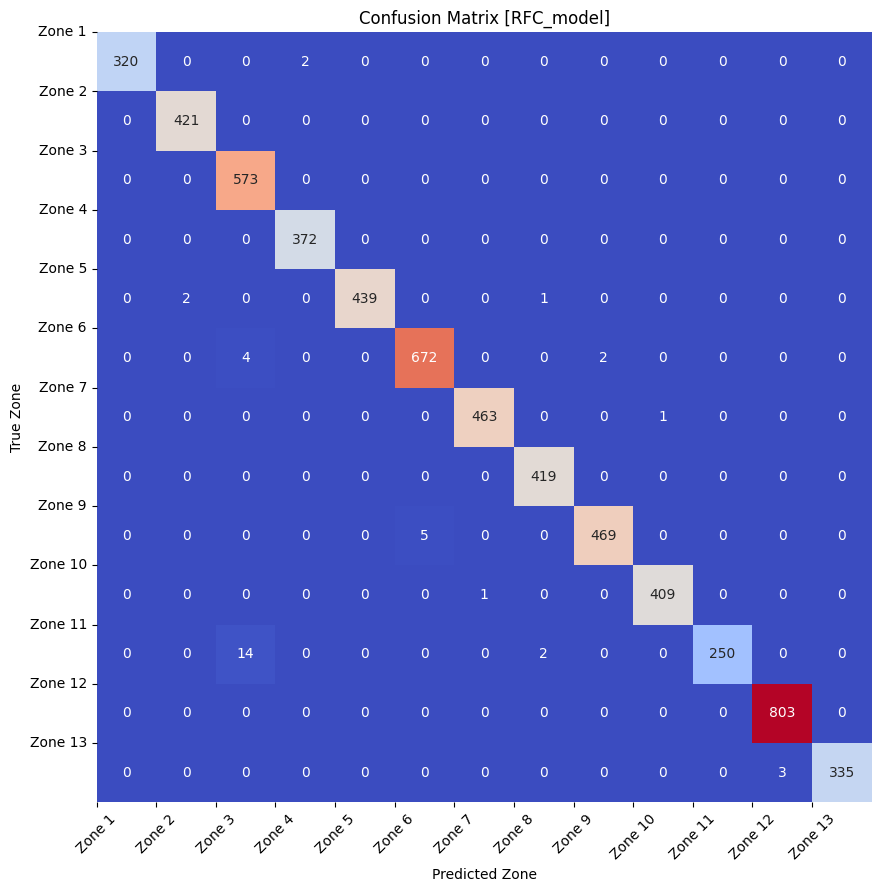

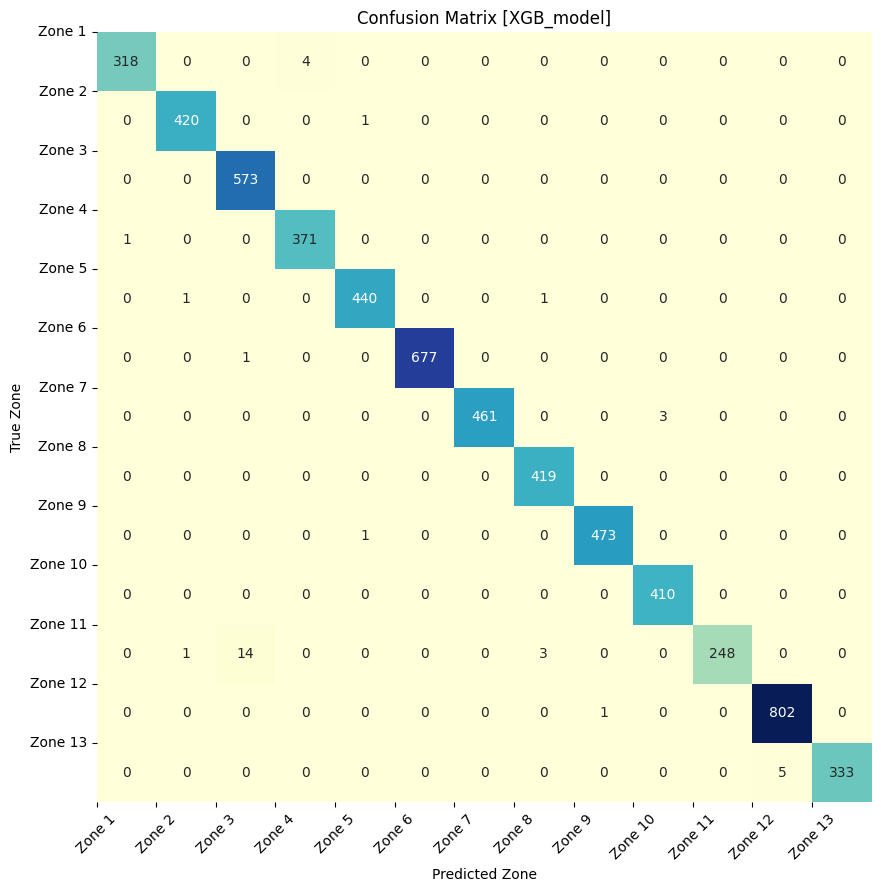

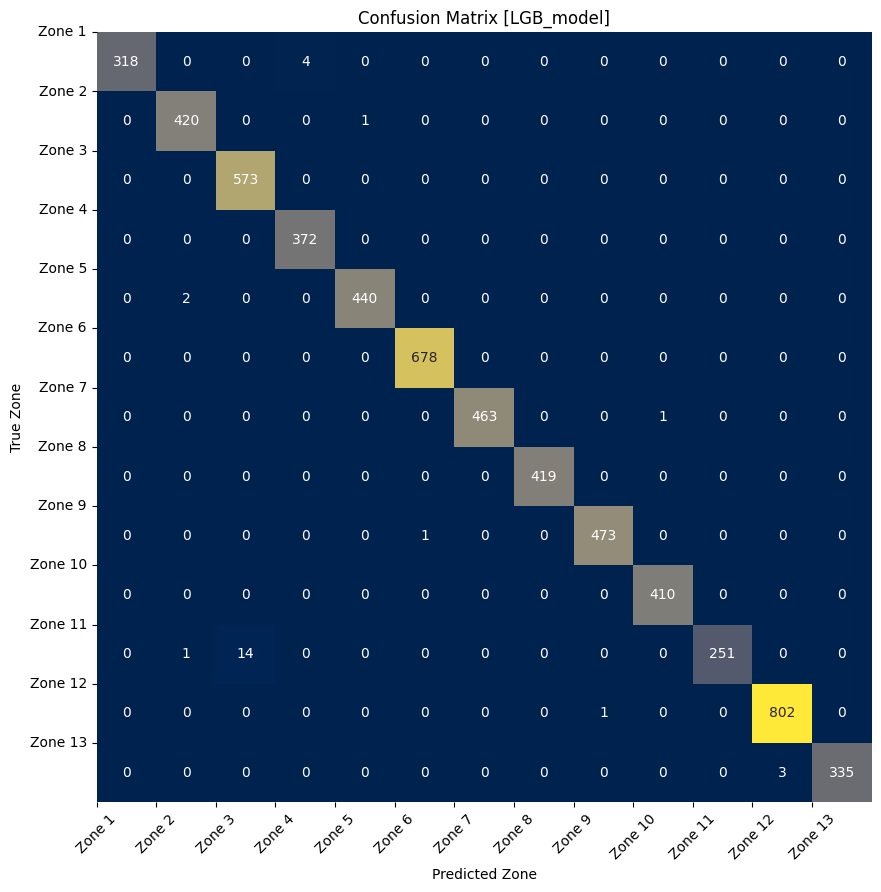

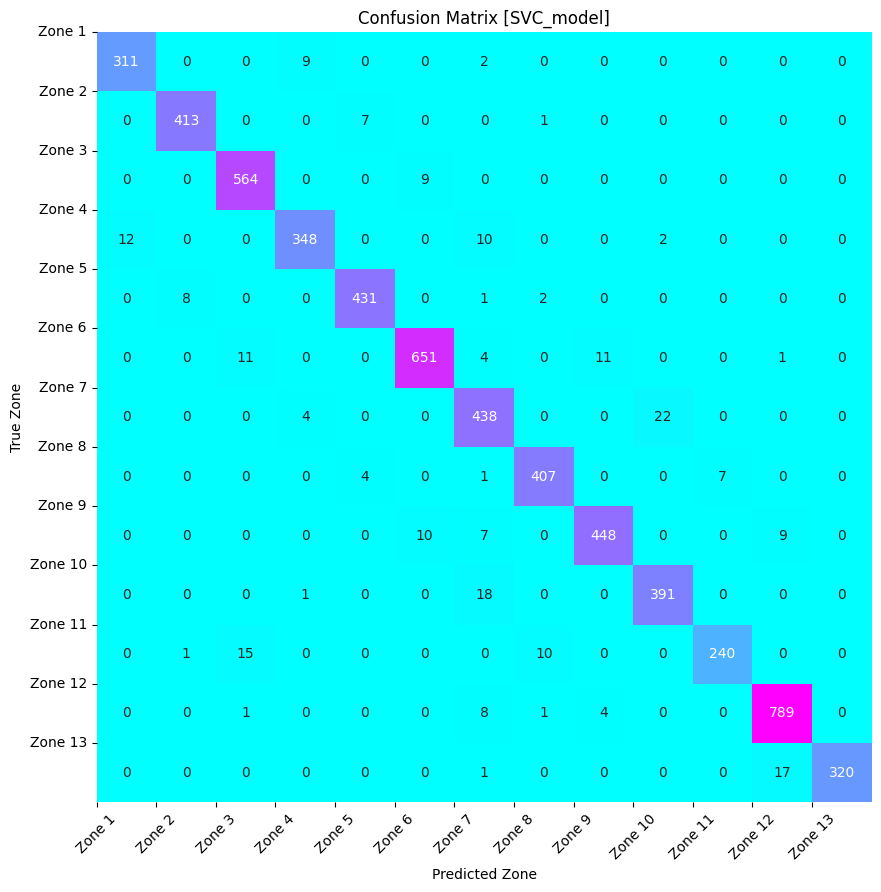

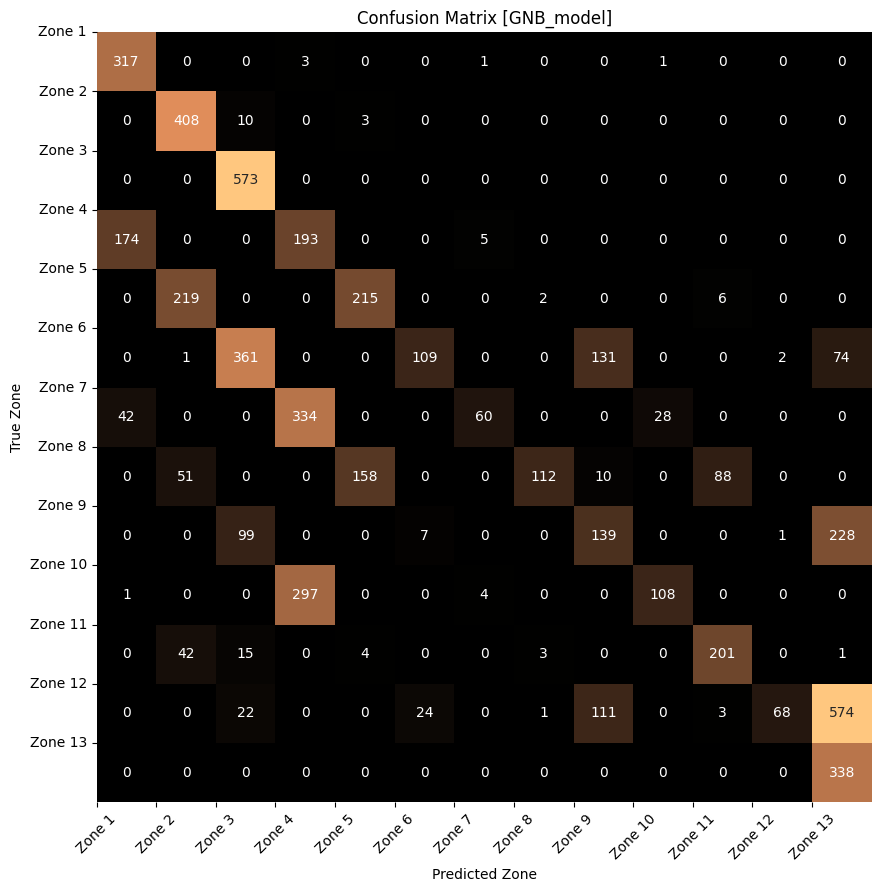

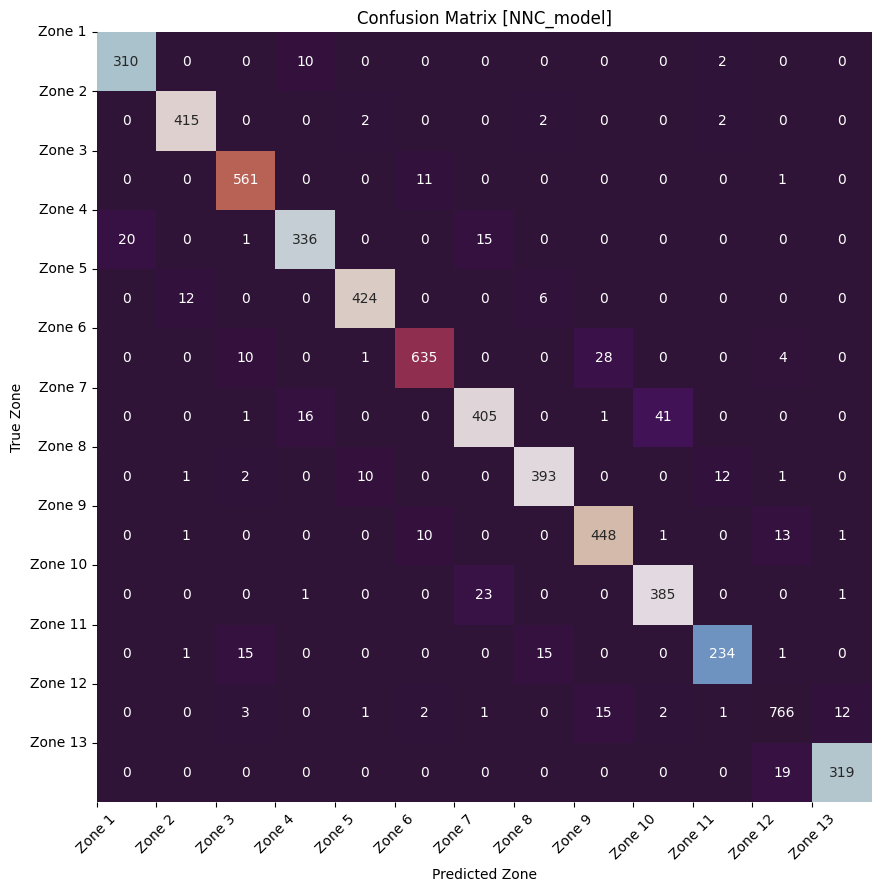

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



for idx, cm in enumerate(model_cm):
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[idx], cbar=False)
    # Add labels, title, and axis ticks
    plt.xlabel('Predicted Zone')
    plt.ylabel('True Zone')
    plt.title(f'Confusion Matrix [{model_list[idx]}]')
    plt.xticks(np.arange(num_classes), classes, rotation=45)
    plt.yticks(np.arange(num_classes), classes, rotation=0)

    # Display the plot
    plt.show()

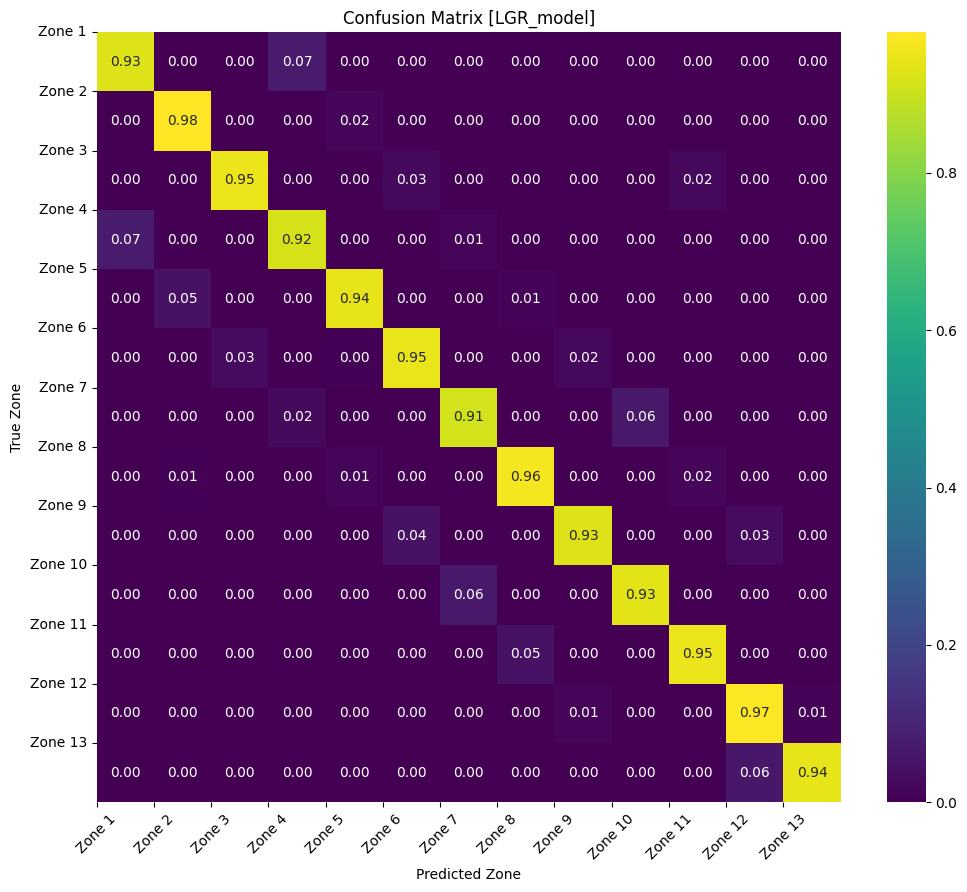

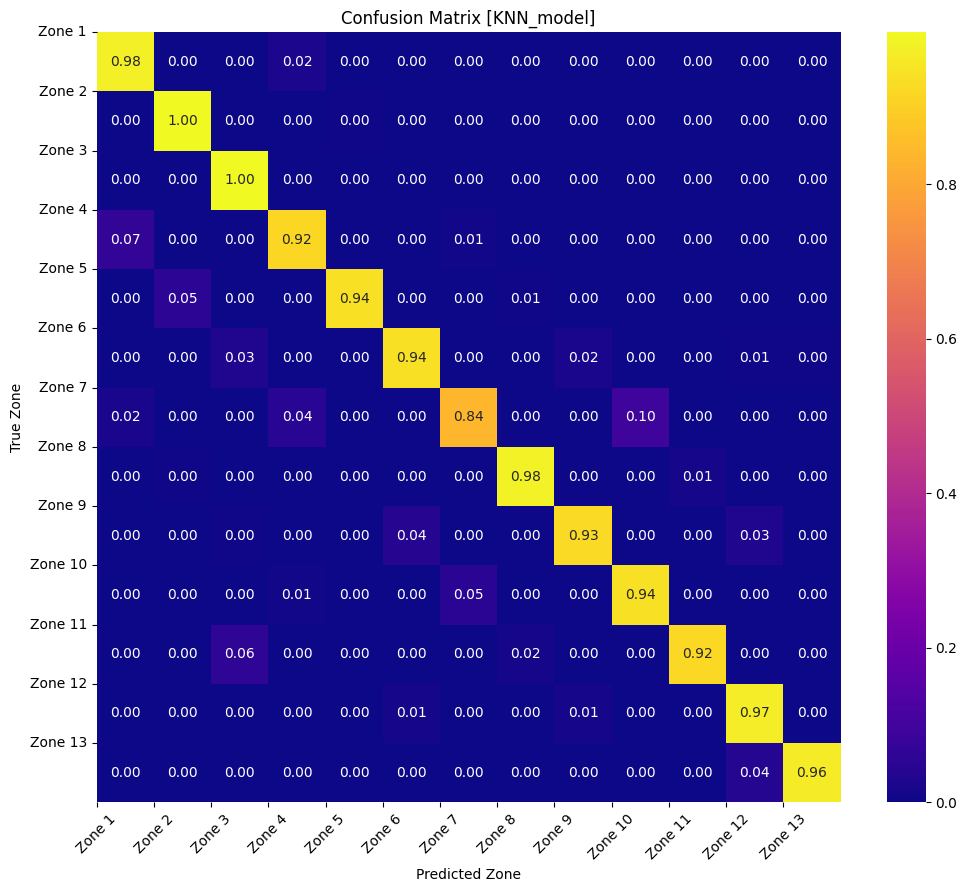

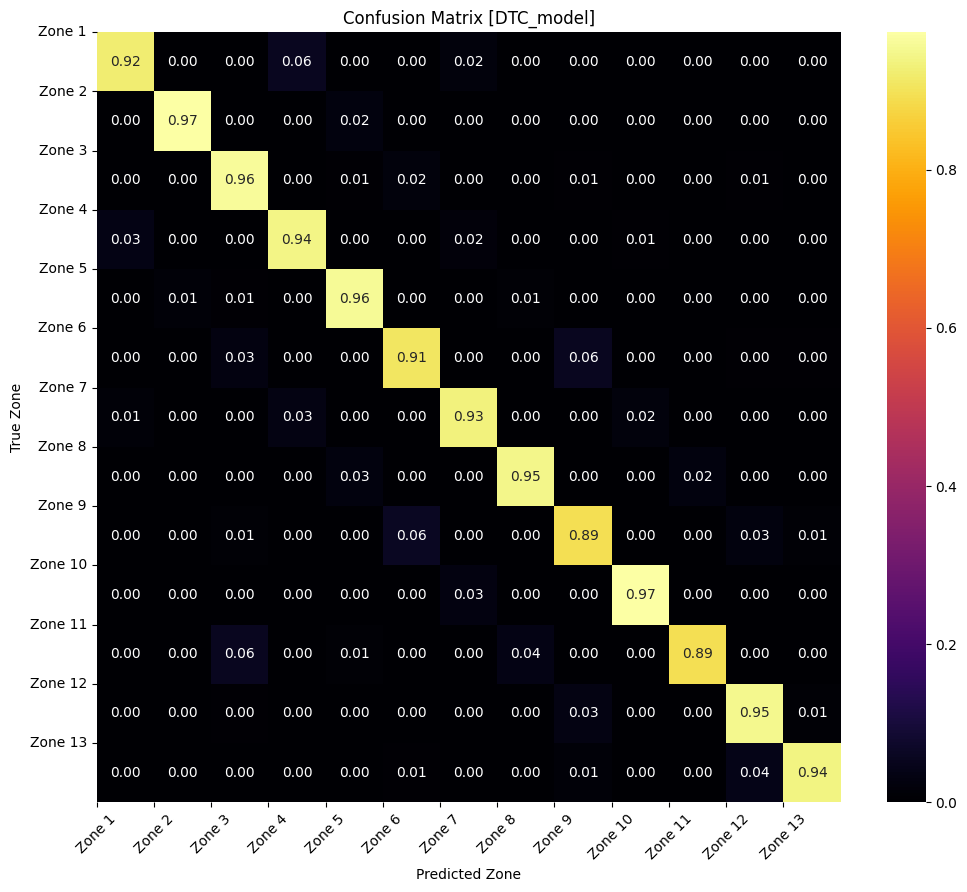

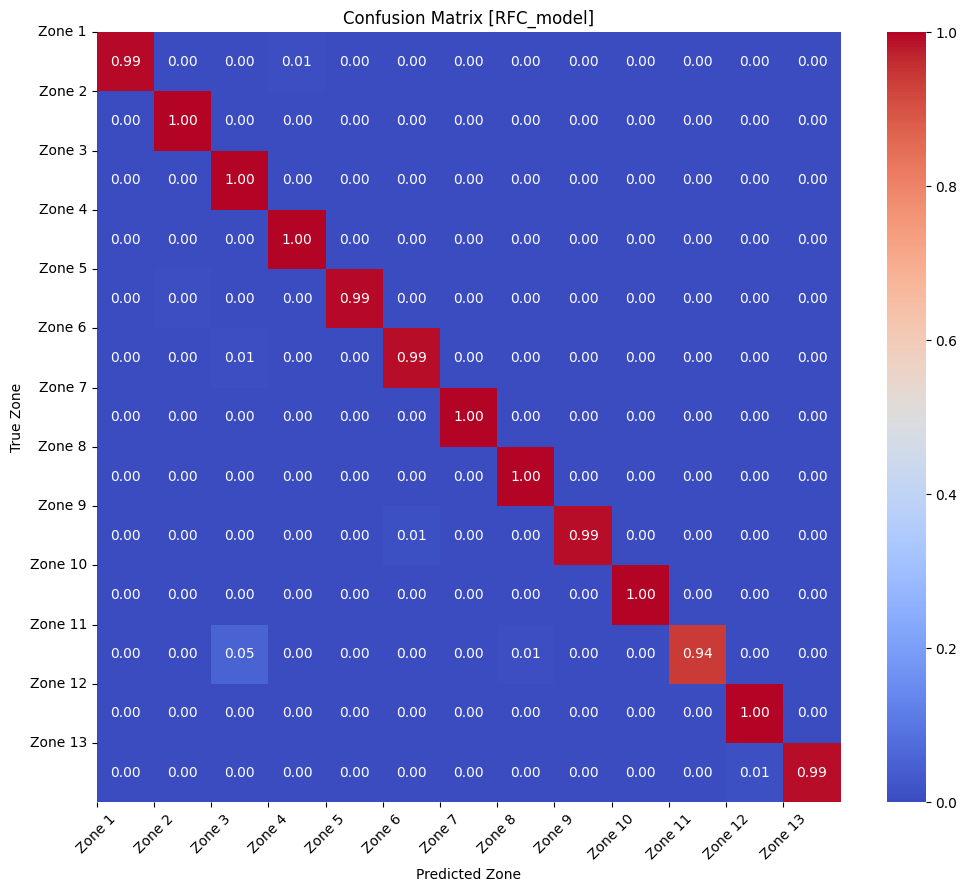

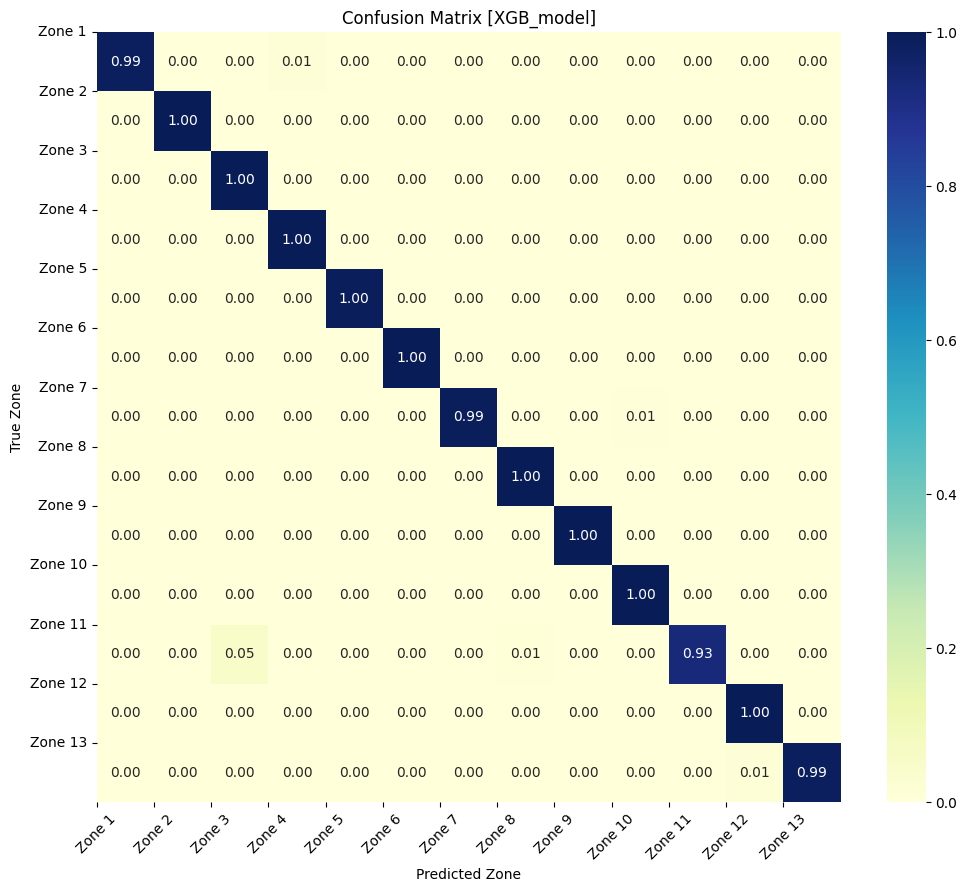

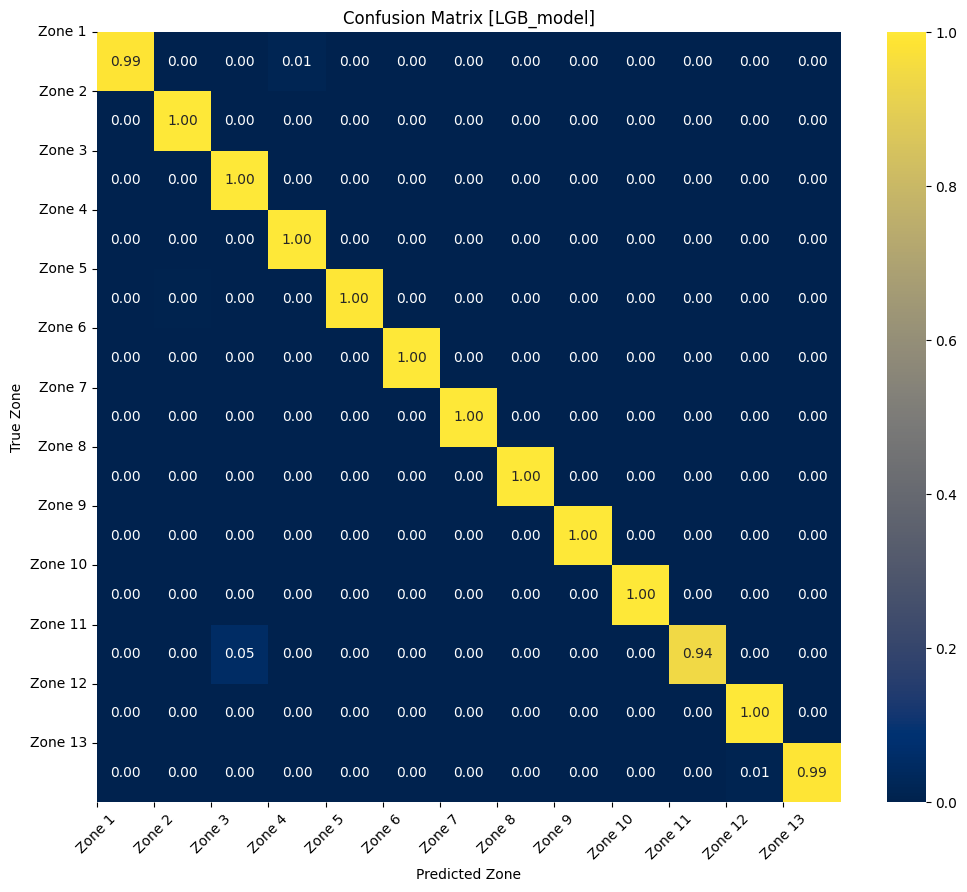

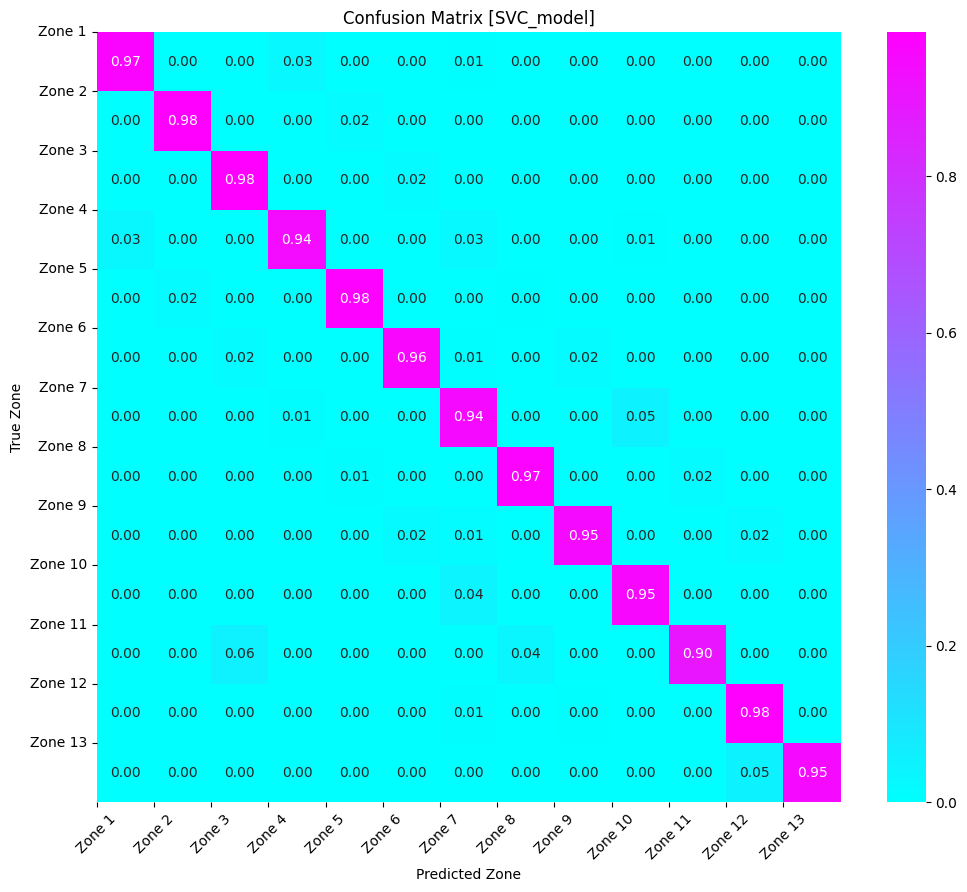

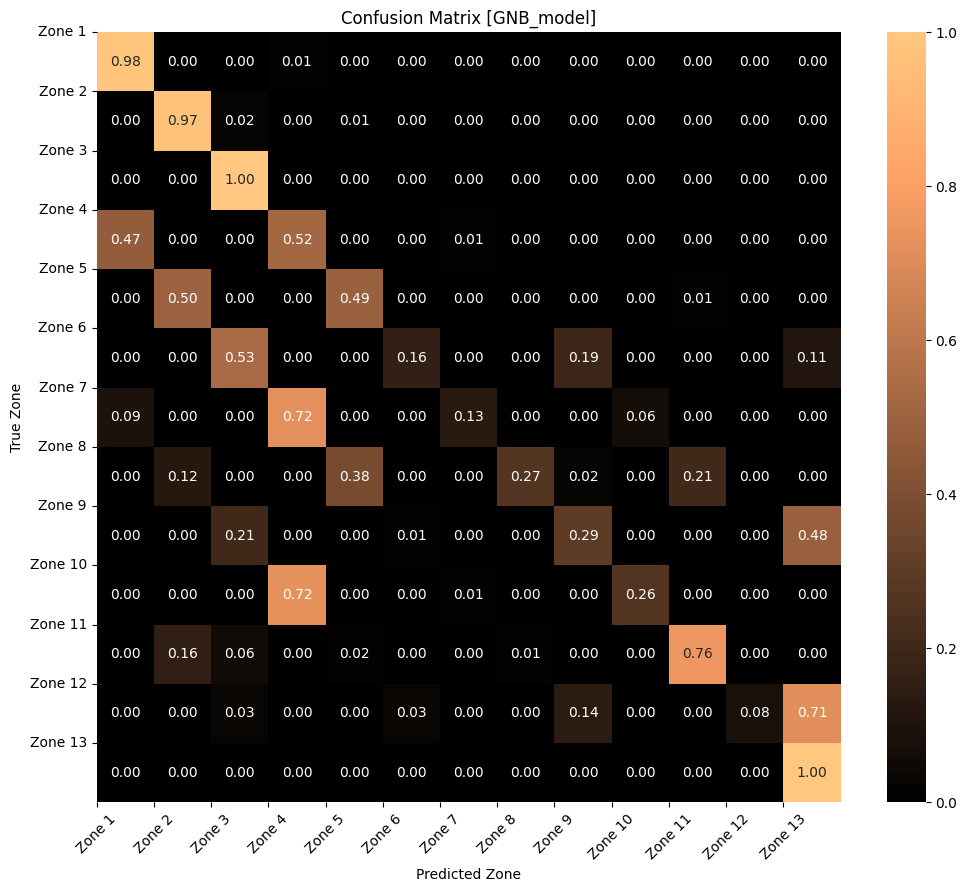

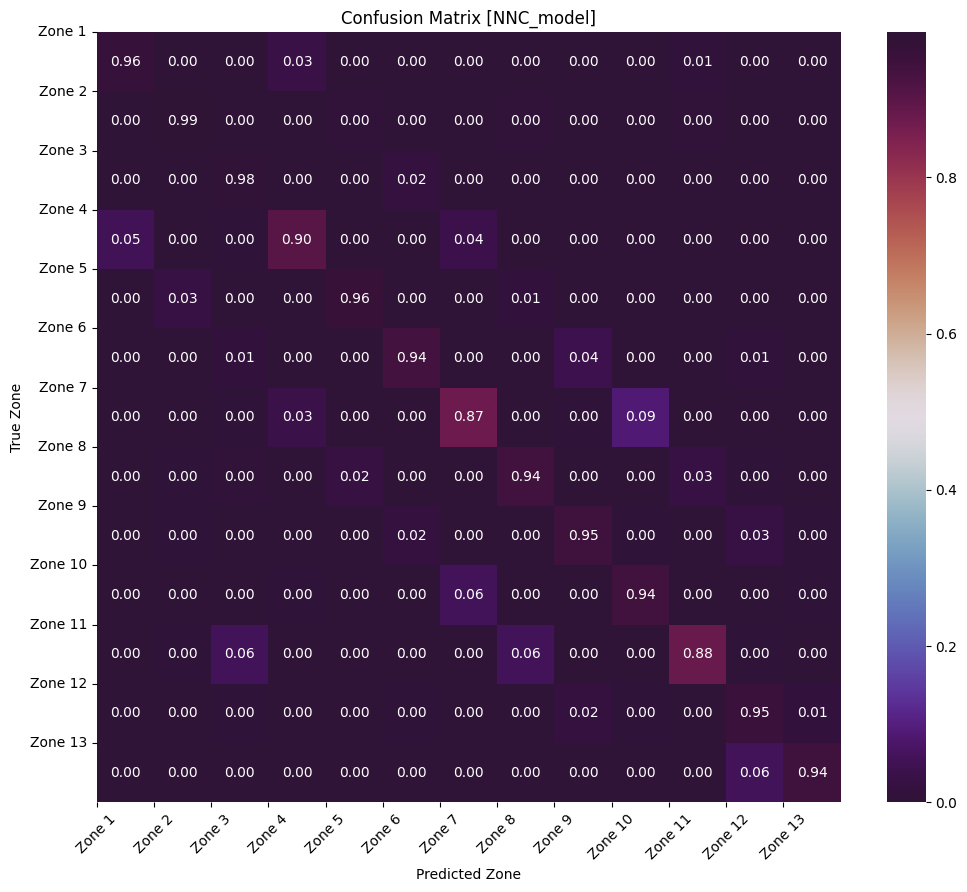

In [37]:
for idx, cm in enumerate(model_cm):
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap=cmaps[idx], cbar=True)

    # Add labels, title, and axis ticks
    plt.xlabel('Predicted Zone')
    plt.ylabel('True Zone')
    plt.title(f'Confusion Matrix [{model_list[idx]}]')
    plt.xticks(np.arange(num_classes), classes, rotation=45)
    plt.yticks(np.arange(num_classes), classes, rotation=0)

    # Display the plot
    plt.show()